<a href="https://colab.research.google.com/github/Nivedhasriram/Machine-Learning-and-Algorithms/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('Enjoy sports.csv')
print(data.head())

   Day   Outlook Temp. Humidity    Wind Decision
0    1     Sunny   Hot     High    Weak       No
1    2     Sunny   Hot     High  Strong       No
2    3  Overcast   Hot     High    Weak      Yes
3    4      Rain  Mild     High    Weak      Yes
4    5      Rain  Cool   Normal    Weak      Yes


In [6]:
import numpy as np

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = 0
    for i in range(len(elements)):
        prob = counts[i] / np.sum(counts)
        entropy_value += -prob * np.log2(prob)
    return entropy_value

In [7]:
def information_gain(data, split_attribute_name, target_name="Decision"):
    total_entropy = entropy(data[target_name])

    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = 0
    for i in range(len(vals)):
        subset = data[data[split_attribute_name] == vals[i]]
        subset_entropy = entropy(subset[target_name])
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy

    information_gain_value = total_entropy - weighted_entropy
    return information_gain_value

In [8]:
def decision_tree(data, original_data, features, target_name="Decision", parent_node_class=None):
    if len(np.unique(data[target_name])) == 1:
        return np.unique(data[target_name])[0]

    elif len(data) == 0:
        return np.unique(original_data[target_name])[np.argmax(np.unique(original_data[target_name], return_counts=True)[1])]

    elif len(features) == 0:
        return parent_node_class

    else:
        parent_node_class = np.unique(data[target_name])[np.argmax(np.unique(data[target_name], return_counts=True)[1])]

        item_values = [information_gain(data, feature, target_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature: {}}

        features = [i for i in features if i != best_feature]

        for value in np.unique(data[best_feature]):
            sub_data = data[data[best_feature] == value]
            subtree = decision_tree(sub_data, original_data, features, target_name, parent_node_class)
            tree[best_feature][value] = subtree

        return tree

In [13]:
def print_tree(tree, depth=0):
    if isinstance(tree, dict):
        for key, value in tree.items():
            print(f"{'|   ' * depth}{key}")
            print_tree(value, depth + 1)
    else:
        print(f"{'|   ' * depth}--> {tree}")

print_tree(tree)

Outlook
|   Overcast
|   |   --> Yes
|   Rain
|   |   Wind
|   |   |   Strong
|   |   |   |   --> No
|   |   |   Weak
|   |   |   |   --> Yes
|   Sunny
|   |   Humidity
|   |   |   High
|   |   |   |   --> No
|   |   |   Normal
|   |   |   |   --> Yes


In [14]:
#Question-2

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in data.columns[1:]:
    data[column] = label_encoder.fit_transform(data[column])

print("Encoded DataFrame:")
print(data)

Encoded DataFrame:
    Day  Outlook  Temp.  Humidity  Wind  Decision
0     1        2      1         0     1         0
1     2        2      1         0     0         0
2     3        0      1         0     1         1
3     4        1      2         0     1         1
4     5        1      0         1     1         1
5     6        1      0         1     0         0
6     7        0      0         1     0         1
7     8        2      2         0     1         0
8     9        2      0         1     1         1
9    10        1      2         1     1         1
10   11        2      2         1     0         1
11   12        0      2         0     0         1
12   13        0      1         1     1         1
13   14        1      2         0     0         0


In [18]:
from sklearn.tree import DecisionTreeClassifier

X = data[['Outlook', 'Temp.', 'Humidity', 'Wind']]
y = data['Decision']

clf = DecisionTreeClassifier()

clf.fit(X, y)

DecisionTreeClassifier()

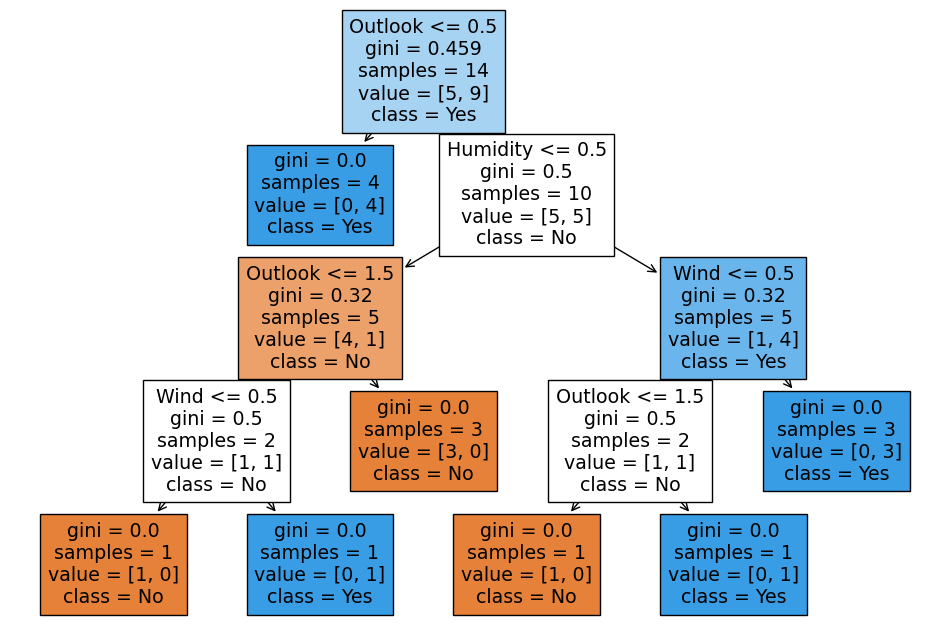

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [20]:
#Question-3

In [27]:
import pandas as pd

iris = pd.read_csv('iris.csv')
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [28]:
from sklearn.model_selection import train_test_split

X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 120
Test set size: 30


In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Decision Tree trained")

Decision Tree trained


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy of the model: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [31]:
#Question-4

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print("Random Forest model trained")

Random Forest model trained


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy of the Random Forest model: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
